In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/Documents/repos/juDataNSOM`


In [2]:
using DataAnNSOM, LinearAlgebra,Interpolations,Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
mo,dy = 10,15; fi=2
nEl = 5
data,datAmp,datFase = DataAnNSOM.read_FileData(mo,dy,fi);
size(data)

(3, 2, 45)

# NSOM Rejilla

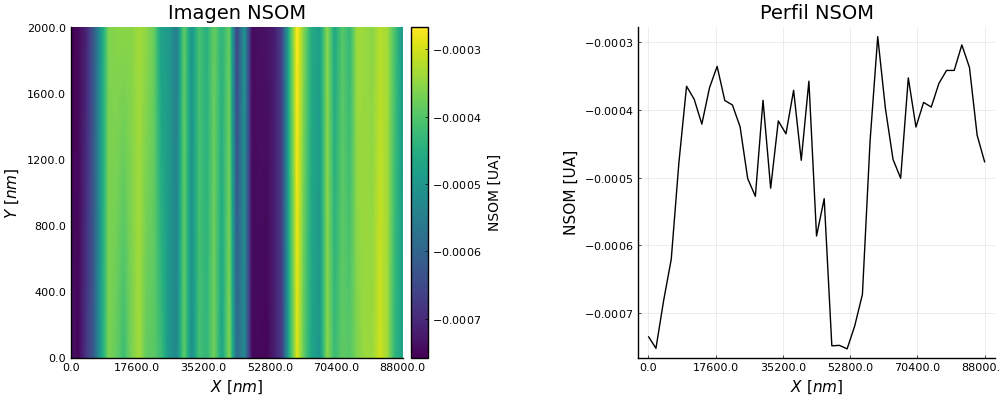

In [6]:

datIm = data[2,:,:]
labelT = "NSOM [UA]"

p1 = DataAnNSOM.plotImag(mo,dy,datIm, labelT,5,fi)
p1 = title!("Imagen NSOM")
#p1 = hline!([1,1], c = :red, label=:none)
p2 = DataAnNSOM.plotProfile(mo,dy,datIm, labelT,5,1,fi);
p2 = title!("Perfil NSOM")
#plot(p1,p2, size=(1200,400) )
plot(p1,p2, size=(1000,400))

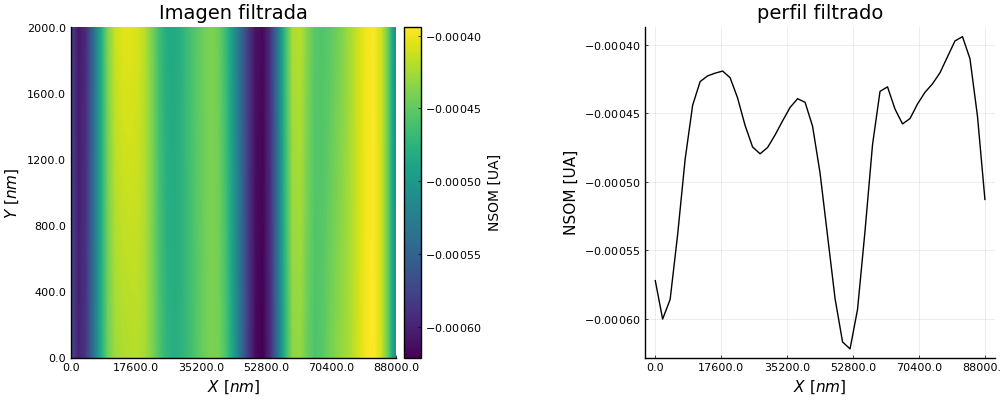

In [7]:
n0,nct = 0,4
opt,order = "GH",4
datFiltr1 = DataAnNSOM.getFiltImag1(datIm,n0,nct,opt,order)

p1f = DataAnNSOM.plotImag(mo,dy,datFiltr1, labelT,5,fi)
p1f = title!("Imagen filtrada")
p2f = DataAnNSOM.plotProfile(mo,dy,datFiltr1, labelT,5,1,fi)
p2f = title!("perfil filtrado")
plot(p1f,p2f, size=(1000,400))

In [6]:
PSD,dataF = DataAnNSOM.GetFourierCoefs1(datIm[1,:])
_,indices = DataAnNSOM.GetFilteredData1(dataF,n0,nct,opt,order)
DataAnNSOM.PlotFilter(PSD,indices);

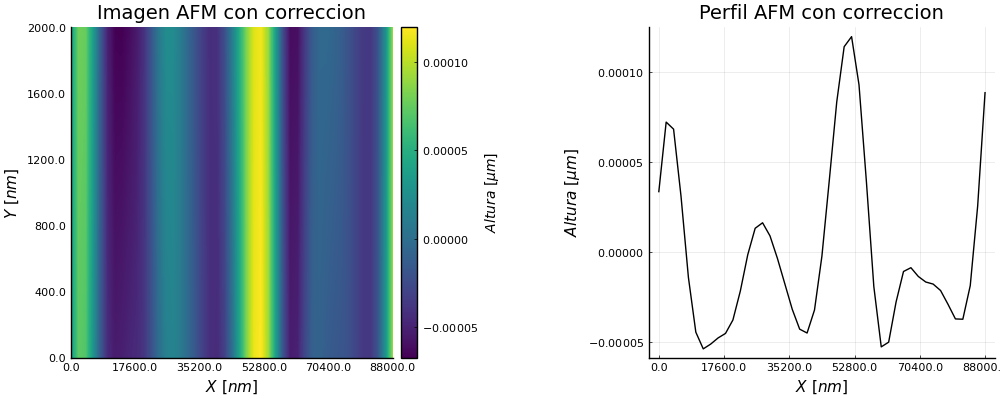

In [7]:
λ,ratio = 700,1e-6
itrM = 100
ImwBNs = zeros(size(datFiltr1))
for i in 1:size(datIm,1)
    y = datFiltr1[i,:]
    z,_ = DataAnNSOM.EraseBL(y,λ,ratio,itrM)
    ImwBNs[i,:] = z-y
end
labelT = L"Altura~[\mu m]" 
p1wB = DataAnNSOM.plotImag(mo,dy,ImwBNs, labelT,5,fi)
p1wb = title!("Imagen AFM con correccion")
p2wB = p2 = DataAnNSOM.plotProfile(mo,dy,ImwBNs, labelT,5,1,fi)
p2wb = title!("Perfil AFM con correccion")
plot(p1wB,p2wB, size=(1000,400))

# =============================================================================

### Imagen con Bs

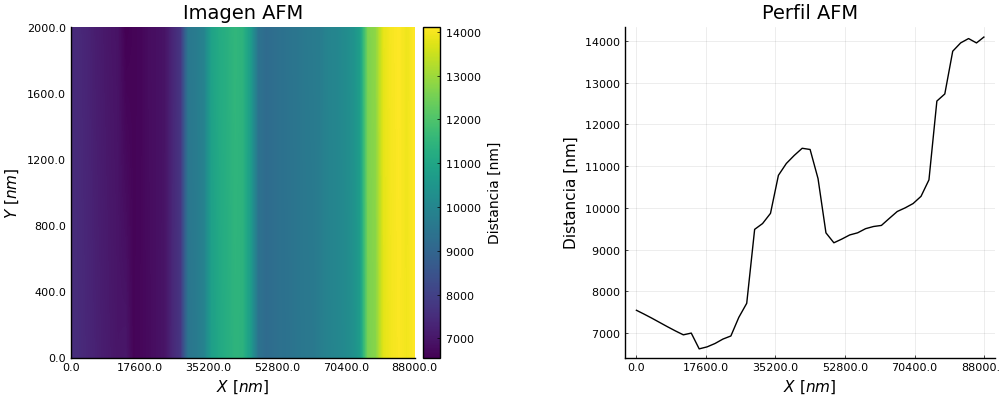

In [9]:

datIm = data[1,:,:]
labelT = "Distancia [nm]"

p1 = DataAnNSOM.plotImag(mo,dy,datIm, labelT,5,fi)
p1 = title!("Imagen AFM")
#p1 = hline!([1,1], c = :red, label=:none)
p2 = DataAnNSOM.plotProfile(mo,dy,datIm, labelT,5,1,fi);
p2 = title!("Perfil AFM")
#plot(p1,p2, size=(1200,400) )
plot(p1,p2, size=(1000,400))

## +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

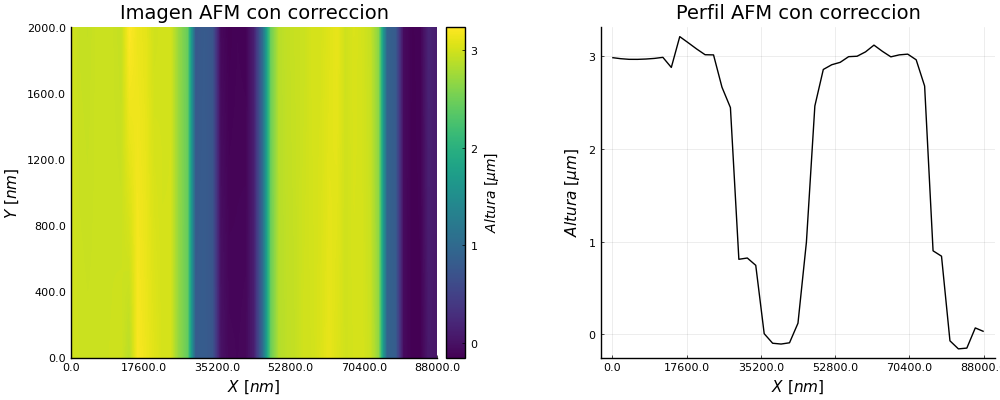

In [16]:
λ,ratio = 40,1e-10
itrM = 1000
ImwB = zeros(size(datIm))
err=0
for i in 1:size(datIm,1)
    y = datIm[i,:]
    z,err = DataAnNSOM.EraseBL(y,λ,ratio,itrM)
    ImwB[i,:] = z-y
end
ImwB = (ImwB.+3000)/1000; labelT = L"Altura~[\mu m]" 
p1wB = DataAnNSOM.plotImag(mo,dy,ImwB, labelT,5,fi)
p1wb = title!("Imagen AFM con correccion")
p2wB = p2 = DataAnNSOM.plotProfile(mo,dy,ImwB, labelT,5,1,fi)
p2wb = title!("Perfil AFM con correccion")
plot(p1wB,p2wB, size=(1000,400))


In [17]:
err

5.653823554811987e-11

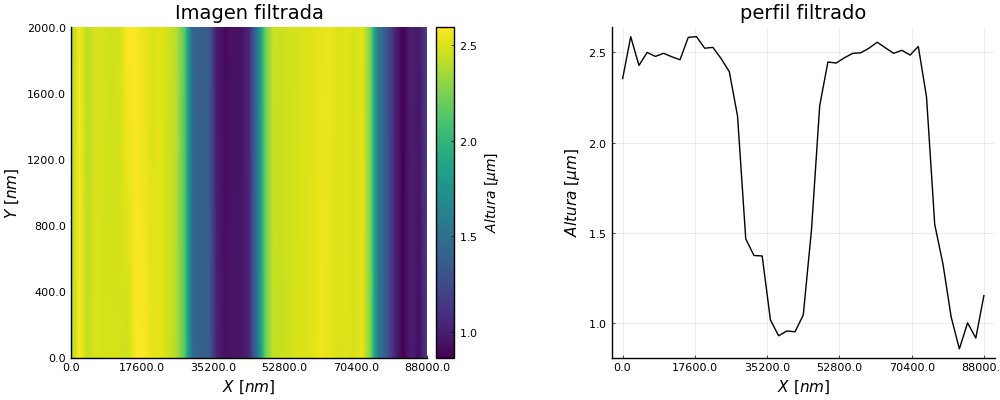

In [18]:
n0,nct = 5,6
opt,order = "GH",5
datFiltr2 = DataAnNSOM.getFiltImag1(ImwB,n0,nct,opt,order)

p1f = DataAnNSOM.plotImag(mo,dy,datFiltr2, labelT,5,fi)
p1f = title!("Imagen filtrada")
p2f = DataAnNSOM.plotProfile(mo,dy,datFiltr2, labelT,5,1,fi)
p2f = title!("perfil filtrado")
plot(p1f,p2f, size=(1000,400))

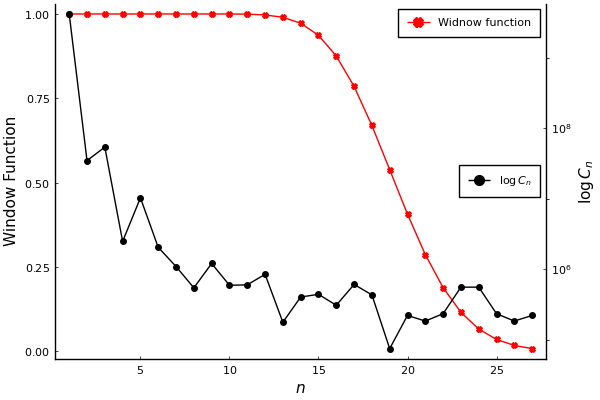

In [11]:
PSD,dataF = DataAnNSOM.GetFourierCoefs1(datIm[1,:])
_,indices = DataAnNSOM.GetFilteredData1(dataF,n0,nct,opt,order)
DataAnNSOM.PlotFilter(PSD,indices)

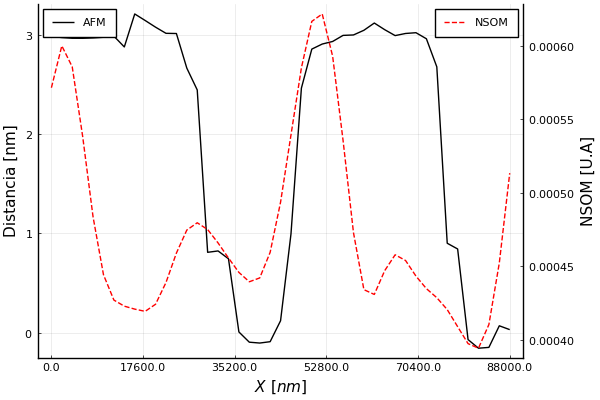

In [20]:
i = fi

dat1,dat2 = -datFiltr1[1,:],ImwB[1,:]; 
label1,label2="Distancia [nm]","NSOM [U.A]"
DataAnNSOM.PlotCompProfiles(mo,dy,i,dat1,dat2,label1,label2,5)

# ==========================================================================================

In [13]:
ArrAmp = DataAnNSOM.GetArrdat(datIm,datAmp); ArrFase = DataAnNSOM.GetArrdat(datIm,datFase);
ErrAr = DataAnNSOM.getErrArr(ArrAmp,datIm);  DiffArr = DataAnNSOM.GetDifAmp(ArrFase,datIm);

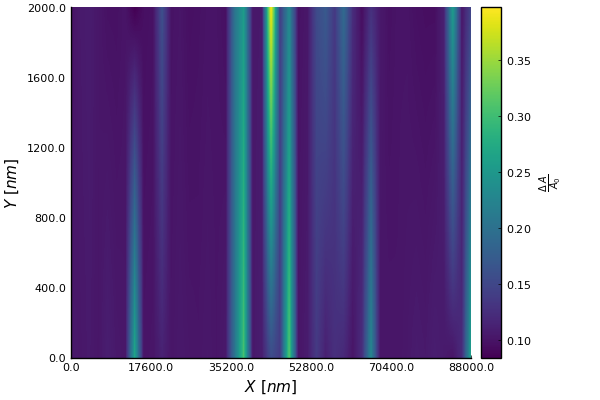

In [14]:
DataAnNSOM.plotImag(mo,dy,ErrAr,L"$\frac{\Delta~A}{A_0}$",5,fi)

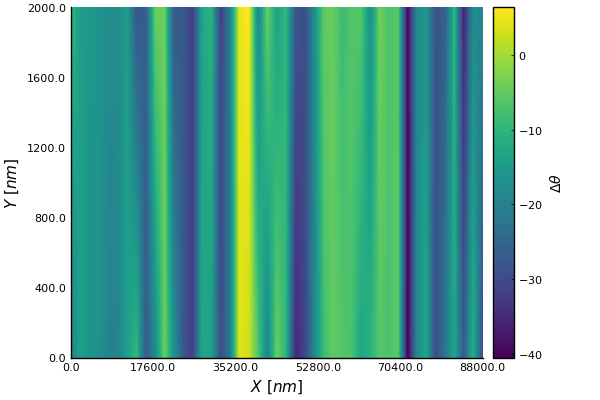

In [15]:
DataAnNSOM.plotImag(mo,dy,DiffArr,L"$\Delta \theta$",5,fi)

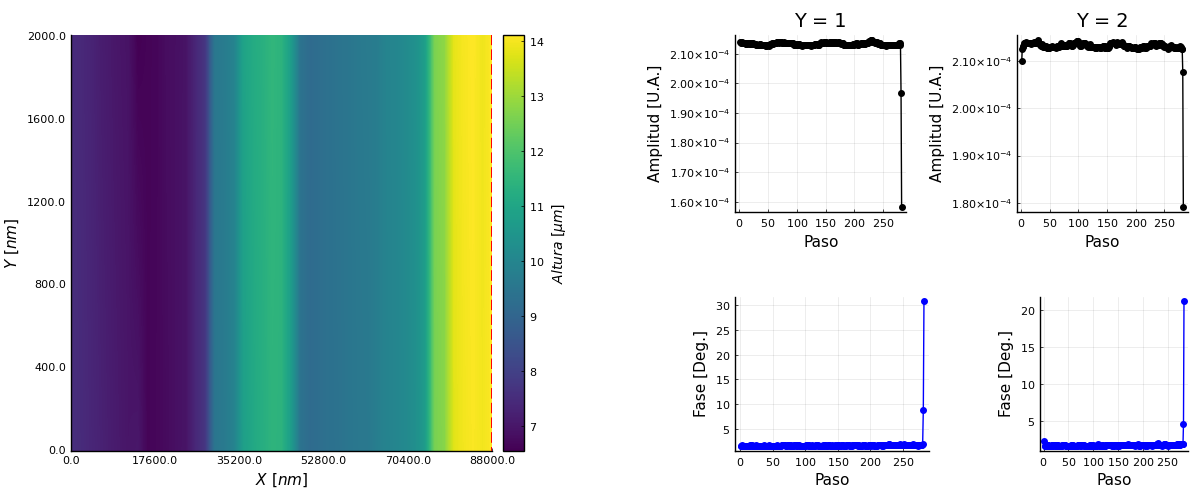

In [16]:
j = 45; YArr=[1,2]
imArr = data[1,:,:]
DataAnNSOM.plotImagwDataEx(mo,dy,imArr,labelT,fi,ArrAmp,ArrFase,YArr,j)

## =========================================================================================